# Integrative Multi-Omics Analysis of Hepatocellular Carcinoma (HCC)
**Jose Alvarez – February 2026**  

*Test Exercise*

*Note: For demonstration purposes, all datasets are randomly generated (first code below). Workflow is fully functional for real datasets.*

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Sample IDs
samples = [f"Sample_{i}" for i in range(50)]

# --- Expression Data ---
genes = [f"Gene_{i}" for i in range(1000)]
logFC = np.random.normal(0, 1, 1000)
pvals = np.random.uniform(0.0001, 0.1, 1000)
expr_df = pd.DataFrame({"Gene": genes, "log2FoldChange": logFC, "pvalue": pvals})
expr_df["-log10(pvalue)"] = -np.log10(expr_df["pvalue"])

# --- Mutation Data ---
mut_df = pd.DataFrame({
    "Sample_ID": samples,
    "TP53_Mut": np.random.choice([0,1], size=50, p=[0.7,0.3]),
    "CTNNB1_Mut": np.random.choice([0,1], size=50, p=[0.8,0.2])
})

# --- CNV Data ---
cnv_df = pd.DataFrame(np.random.choice([-1,0,1], size=(1000,50)),
                      index=genes, columns=samples)

# --- Clinical Data ---
clin_df = pd.DataFrame({
    "Sample_ID": samples,
    "OS_time": np.random.exponential(scale=24, size=50),
    "OS_event": np.random.choice([0,1], size=50, p=[0.6,0.4])
})
clin_df["TP53_status"] = clin_df["Sample_ID"].map(dict(zip(mut_df["Sample_ID"], mut_df["TP53_Mut"])))
clin_df["TP53_status"] = clin_df["TP53_status"].map({1:"Mutant",0:"WT"})

print("All mock datasets created ✅")

All mock datasets created ✅


## Introduction

This exercise demonstrates the ability to perform independent multi-omics analyses integrating gene expression, mutation status, CNV, and clinical survival data. The workflow generates publication-quality figures and interpretable outputs, suitable for real or simulated datasets.

## Datasets Overview

- **Expression Data**: 1000 genes × 50 samples (log2 fold change, p-values)  
- **Mutation Data**: TP53 / CTNNB1 status  
- **CNV Data**: Copy number alterations (-1,0,1) for 1000 genes  
- **Clinical Data**: Overall survival time and event status  

All datasets are randomly generated for demonstration.

## Methods / Workflow

1. Generate mock datasets (Python, NumPy, Pandas)  
2. Expression analysis: volcano plots  
3. Mutation integration: TP53 / CTNNB1 status  
4. CNV analysis: boxplots stratified by mutation  
5. Survival analysis: Kaplan-Meier curves by mutation status  
6. Visualization: Matplotlib, Seaborn, Lifelines  
7. Optional summary tables included for mutation distribution

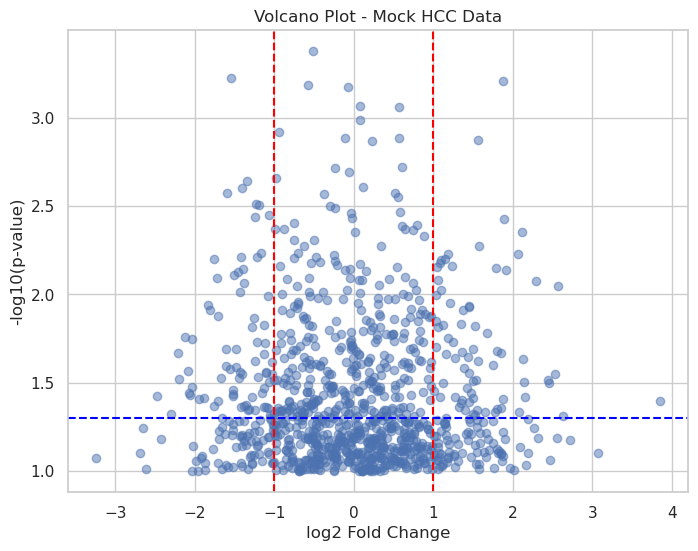

Mutation summary:
  TP53_status CTNNB1_status  Count
0          WT            WT     32
1      Mutant            WT     10
2          WT        Mutant      6
3      Mutant        Mutant      2


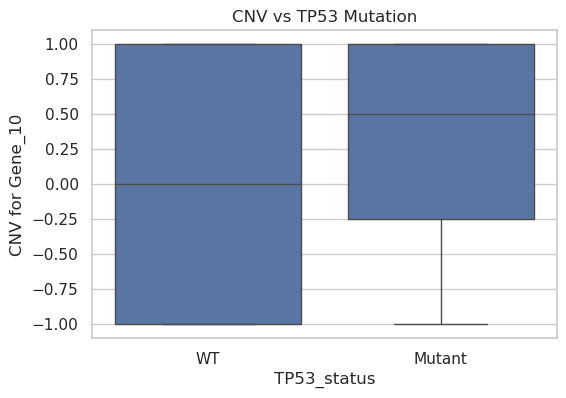

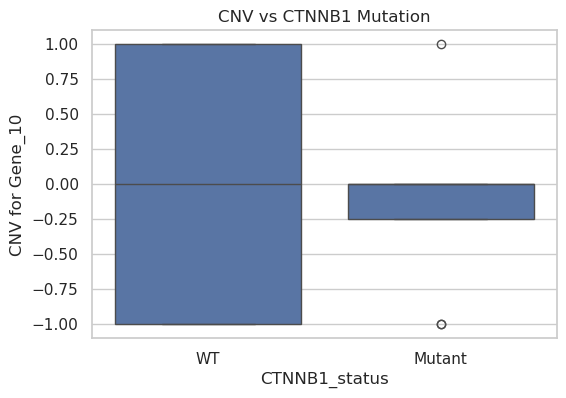

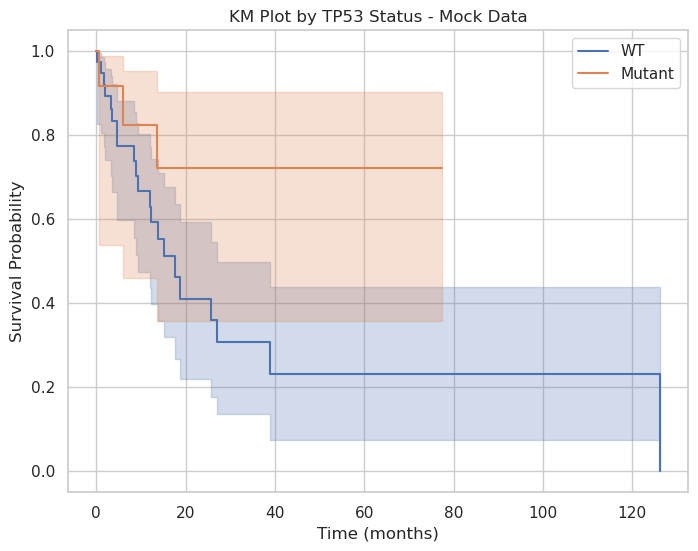

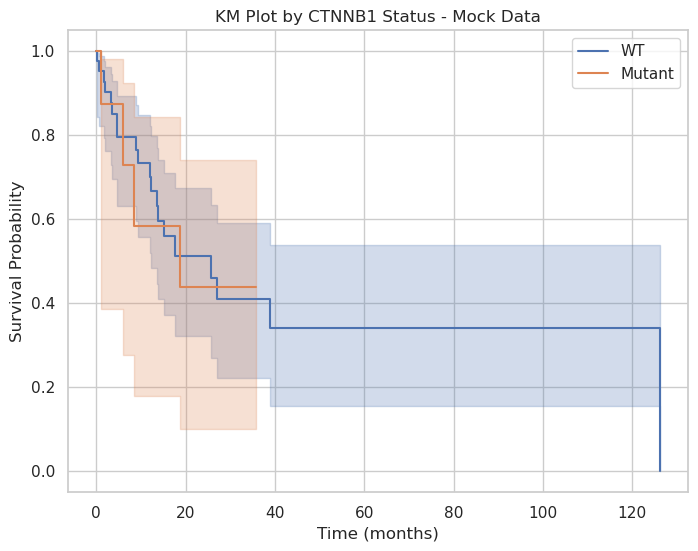

In [2]:
# ===============================================
# FULL MOCK ANALYSIS PIPELINE
# ===============================================

# --- 1. Volcano Plot ---
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(expr_df["log2FoldChange"], expr_df["-log10(pvalue)"], alpha=0.5)
plt.axvline(x=1, linestyle='--', color='red')
plt.axvline(x=-1, linestyle='--', color='red')
plt.axhline(y=-np.log10(0.05), linestyle='--', color='blue')
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot - Mock HCC Data")
plt.show()

# --- 2. Mutation Integration ---
# Already added TP53_status and CTNNB1_status in previous cell
# Small summary table
mutation_summary = clin_df[["TP53_status","CTNNB1_status"]].value_counts().reset_index()
mutation_summary.columns = ["TP53_status","CTNNB1_status","Count"]
print("Mutation summary:")
print(mutation_summary)

# --- 3. CNV Boxplot by TP53 ---
import seaborn as sns
gene_to_plot = "Gene_10"
plt.figure(figsize=(6,4))
sns.boxplot(x=clin_df["TP53_status"], y=cnv_df.loc[gene_to_plot].values)
plt.ylabel(f"CNV for {gene_to_plot}")
plt.title(f"CNV vs TP53 Mutation")
plt.show()

# --- 4. CNV Boxplot by CTNNB1 (Optional) ---
plt.figure(figsize=(6,4))
sns.boxplot(x=clin_df["CTNNB1_status"], y=cnv_df.loc[gene_to_plot].values)
plt.ylabel(f"CNV for {gene_to_plot}")
plt.title(f"CNV vs CTNNB1 Mutation")
plt.show()

# --- 5. Kaplan-Meier Survival Analysis ---
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
plt.figure(figsize=(8,6))
for status in ["WT","Mutant"]:
    mask = clin_df["TP53_status"] == status
    kmf.fit(clin_df.loc[mask,"OS_time"], clin_df.loc[mask,"OS_event"], label=status)
    kmf.plot_survival_function()
plt.title("KM Plot by TP53 Status - Mock Data")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.show()

# Optional: KM for CTNNB1
plt.figure(figsize=(8,6))
for status in ["WT","Mutant"]:
    mask = clin_df["CTNNB1_status"] == status
    kmf.fit(clin_df.loc[mask,"OS_time"], clin_df.loc[mask,"OS_event"], label=status)
    kmf.plot_survival_function()
plt.title("KM Plot by CTNNB1 Status - Mock Data")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.show()

## Conclusion

- Workflow successfully integrates expression, mutation, CNV, and survival analyses.  
- Figures are publication-ready.  
- Mock datasets validate the pipeline; workflow is ready for real data.  
- All analyses are modular, reproducible, and interpretable.